<a href="https://colab.research.google.com/github/CemOguz/SentimentAnalysis/blob/main/SENTIMENT_ANALYSIS_IUBH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('amazon_reviews_us_Digital_Video_Games_v1_00.tsv',sep = '\t')

In [4]:
data.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,21269168,RSH1OZ87OYK92,B013PURRZW,603406193,Madden NFL 16 - Xbox One Digital Code,Digital_Video_Games,2,2,3,N,N,A slight improvement from last year.,I keep buying madden every year hoping they ge...,2015-08-31
1,US,133437,R1WFOQ3N9BO65I,B00F4CEHNK,341969535,Xbox Live Gift Card,Digital_Video_Games,5,0,0,N,Y,Five Stars,Awesome,2015-08-31
2,US,45765011,R3YOOS71KM5M9,B00DNHLFQA,951665344,Command & Conquer The Ultimate Collection [Ins...,Digital_Video_Games,5,0,0,N,Y,Hail to the great Yuri!,If you are prepping for the end of the world t...,2015-08-31
3,US,113118,R3R14UATT3OUFU,B004RMK5QG,395682204,Playstation Plus Subscription,Digital_Video_Games,5,0,0,N,Y,Five Stars,Perfect,2015-08-31
4,US,22151364,RV2W9SGDNQA2C,B00G9BNLQE,640460561,Saints Row IV - Enter The Dominatrix [Online G...,Digital_Video_Games,5,0,0,N,Y,Five Stars,Awesome!,2015-08-31


In [5]:
# Drop rows where review_body is NaN
data.dropna(subset=['review_body'], inplace=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


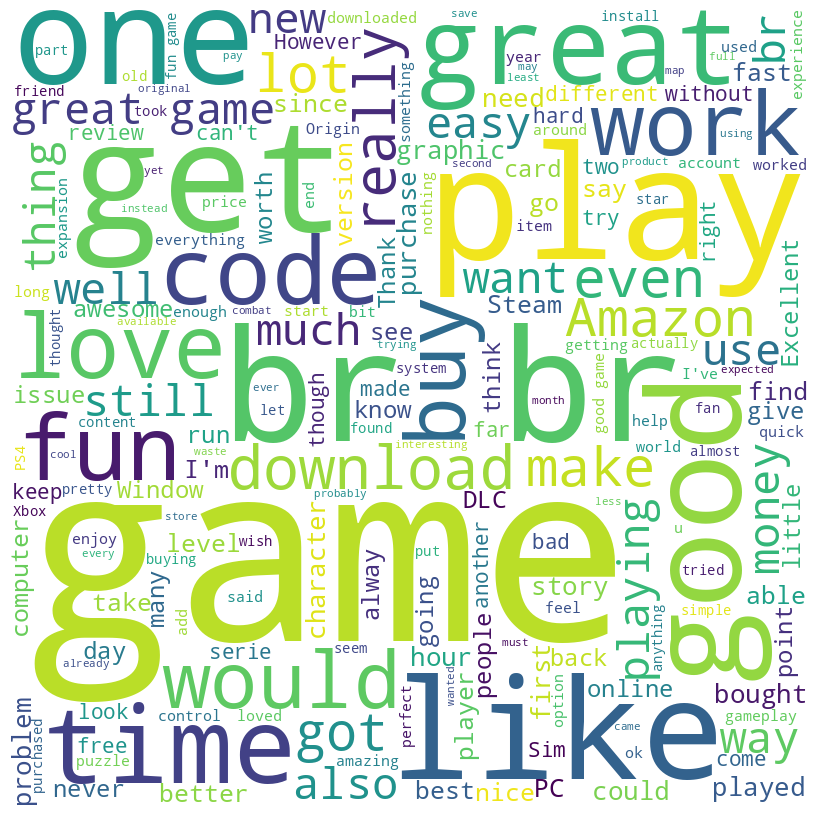

In [6]:
# wordcloud before preprocessing
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Load stop words and stemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

wordcloud = WordCloud(width = 800, height = 800, 
              background_color ='white', 
              stopwords = set(stopwords.words('english')), 
              min_font_size = 10).generate(' '.join(data['review_body'].dropna()))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


In [7]:

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Stem tokens
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Join tokens back into a string
    text = ' '.join(tokens)
    
    return text

# Apply preprocessing function to text data
data['review_body'] = data['review_body'].apply(preprocess_text)


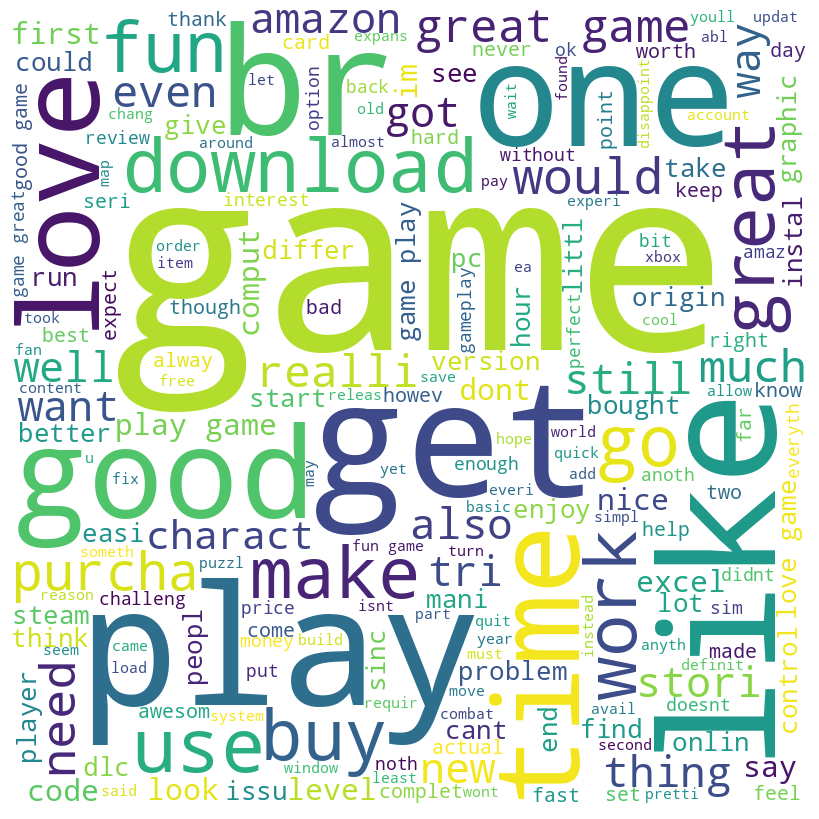

In [8]:
# wordcloud after preprocessing
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
              background_color ='white', 
              stopwords = set(stopwords.words('english')), 
              min_font_size = 10).generate(' '.join(data['review_body'].dropna()))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


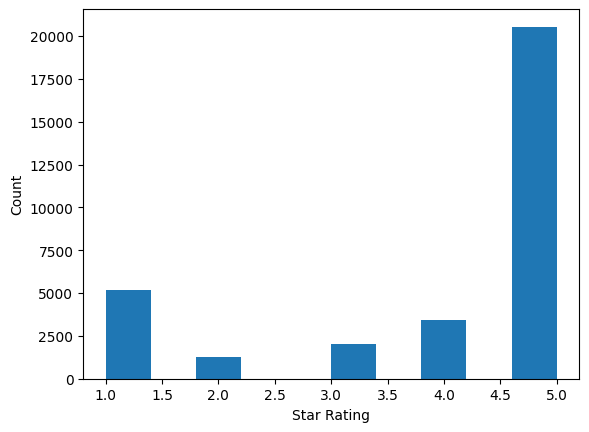

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data['star_rating'])
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()


In [9]:
# Convert star rating to sentiment
data['sentiment'] = data['star_rating'].apply(lambda x: 'positive' if x >= 4 else 'neutral' if x == 3 else 'negative')

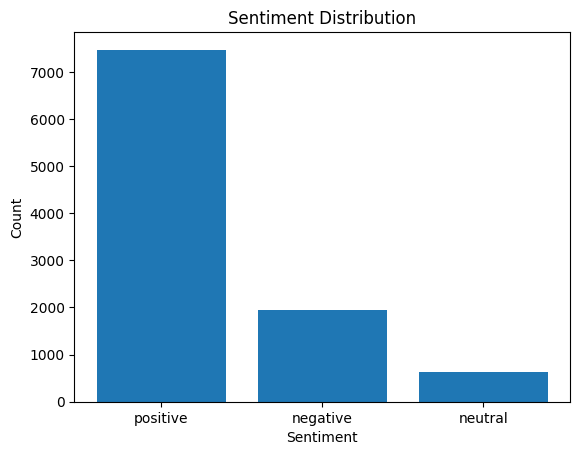

In [10]:
import matplotlib.pyplot as plt

# Create bar chart to visualize sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Proportion of Reviews')

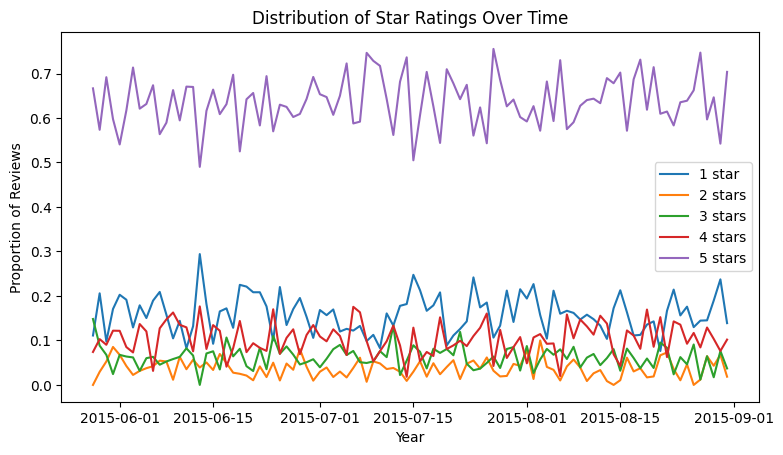

In [22]:
import matplotlib.pyplot as plt

# Convert the 'review_date' column to datetime format
data['review_date'] = pd.to_datetime(data['review_date'])

# Group the data by date and star rating
grouped = data.groupby(['review_date', 'star_rating']).size().reset_index(name='count')

# Pivot the data to create a matrix with date on the x-axis and star rating on the y-axis
pivoted = grouped.pivot(index='review_date', columns='star_rating', values='count').fillna(0)

# Compute the total number of reviews for each month
totals = pivoted.sum(axis=1)

# Compute the proportion of each star rating for each month
proportions = pivoted.divide(totals, axis=0)

#Enlarge the graph
f = plt.figure()
f.set_figwidth(9)

# Plot the proportion of 1-star, 2-star, 3-star, 4-star, and 5-star ratings over time
plt.plot(proportions.index.get_level_values(0), proportions[1], label='1 star')
plt.plot(proportions.index.get_level_values(0), proportions[2], label='2 stars')
plt.plot(proportions.index.get_level_values(0), proportions[3], label='3 stars')
plt.plot(proportions.index.get_level_values(0), proportions[4], label='4 stars')
plt.plot(proportions.index.get_level_values(0), proportions[5], label='5 stars')

# Add a legend, title, and axis labels
plt.legend()
plt.title('Distribution of Star Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Reviews')


In [23]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder
le = LabelEncoder()

# Encode sentiment labels as numerical values
data['sentiment_encoded'] = le.fit_transform(data['sentiment'])


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review_body'], data['sentiment_encoded'], test_size=0.2, random_state=42)
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
# Train random forest classifier on training data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predict sentiment labels for test data
y_pred = rfc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8510956175298805


In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create random forest classifier
rfc = RandomForestClassifier()

# Use grid search to find optimal hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Predict sentiment labels for test data using best hyperparameters
y_pred = grid_search.predict(X_test)

# Calculate accuracy score using best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8520916334661355
